In [1]:
import sys
sys.path.append('../src')
import numpy as np
import matplotlib.pyplot as plt
from world import Patch, Agent
from mvt_brr import MVTModel

In [2]:
model = MVTModel(decay_type='exponential')
mvt_rich, mvt_poor = model.run()

In [59]:
def initialize_env(decay_rate):
    # Define environments
    patch_types = [
    {'type':'Low', 'initial_yield': 32.5, 'decay_rate': decay_rate},
    {'type':'Mid', 'initial_yield': 45, 'decay_rate': decay_rate},
    {'type':'High', 'initial_yield': 57.5, 'decay_rate': decay_rate}
    ]

    # Proportions
    rich_proportions = [0.2, 0.3, 0.5]
    poor_proportions = [0.5, 0.3, 0.2]

    return patch_types, rich_proportions, poor_proportions

initialize_env(0.075)

([{'type': 'Low', 'initial_yield': 32.5, 'decay_rate': 0.075},
  {'type': 'Mid', 'initial_yield': 45, 'decay_rate': 0.075},
  {'type': 'High', 'initial_yield': 57.5, 'decay_rate': 0.075}],
 [0.2, 0.3, 0.5],
 [0.5, 0.3, 0.2])

In [60]:
# Simulation function
def simulate(patch, agent, model, n_runs=1000, n_max=1000):
    leave_times = []
    for _ in range(n_runs):
        patch = Patch(patch['initial_yield'], patch['decay_rate'])
        patch.start_harvesting()
        for t in range(1, n_max+1):
            reward = patch.get_reward()
            if model == 'epsilon_greedy':
                action = agent.choose_action_epsilon(reward, 0.05)
            else:
                action = agent.choose_action(reward)
            if action == 1:
                leave_times.append(t)
                break
    return leave_times

In [87]:
# agent = Agent(beta=0.1, intercept=0)
# leave_times_rich = []
# leave_times_poor = []

# # Initialize counters for greater and less than
# rich_overharvest = [0] * len(mvt_rich)
# rich_underharvest = [0] * len(mvt_rich)
# poor_overharvest = [0] * len(mvt_poor)
# poor_underharvest = [0] * len(mvt_poor)

# for index, (patch, proportion) in enumerate(zip(patch_types, rich_proportions)):
#     leave_times = simulate(patch, agent, n_runs=int(1000 * proportion))
#     for value in leave_times:
#         if value > mvt_rich[index]:
#             rich_overharvest[index] += 1
#         elif value < mvt_rich[index]:
#             rich_underharvest[index] += 1
#     rich_overharvest[index] /= (1000 * proportion)

# for index, (patch, proportion) in enumerate(zip(patch_types, poor_proportions)):
#     leave_times = simulate(patch, agent, n_runs=int(1000 * proportion))
#     for value in leave_times:
#         if value > mvt_poor[index]:
#             poor_overharvest[index] += 1
#         elif value < mvt_poor[index]:
#             poor_underharvest[index] += 1

# print(rich_overharvest, rich_underharvest)
# print(poor_overharvest, poor_underharvest)

In [57]:
# def run_simulation(agent, patch_types, proportions, mvt_values):
#     """Run the simulation for a given agent and environment and count overharvest and underharvest events."""
#     overharvest = [0] * len(mvt_values)
#     underharvest = [0] * len(mvt_values)
    
#     for index, (patch, proportion) in enumerate(zip(patch_types, proportions)):
#         leave_times = simulate(patch, agent, n_runs=int(1000 * proportion))
#         for value in leave_times:
#             if value > mvt_values[index]:
#                 overharvest[index] += 1
#             elif value < mvt_values[index]:
#                 underharvest[index] += 1
#         overharvest[index] /= (1000*proportion)
#         underharvest[index] /= (1000*proportion)
#     return overharvest, underharvest

In [58]:
# def plot_results(ax, beta, intercept, patch_types, rich_result, poor_result):
#     """Plot the simulation results on given axes."""
#     width = 0.35  # Width of the bars
#     ind = np.arange(len(patch_types))  # X locations for the groups
#     ax.bar(ind - width/2, rich_result, width, label='Rich')
#     ax.bar(ind + width/2, poor_result, width, label='Poor')

#     ax.set_title(f'Beta: {beta}, Intercept: {intercept}')
#     ax.set_ylabel('Overharvest %')
#     # ax.set_xticks(ind)
#     ax.set_xticklabels([])
#     ax.legend()

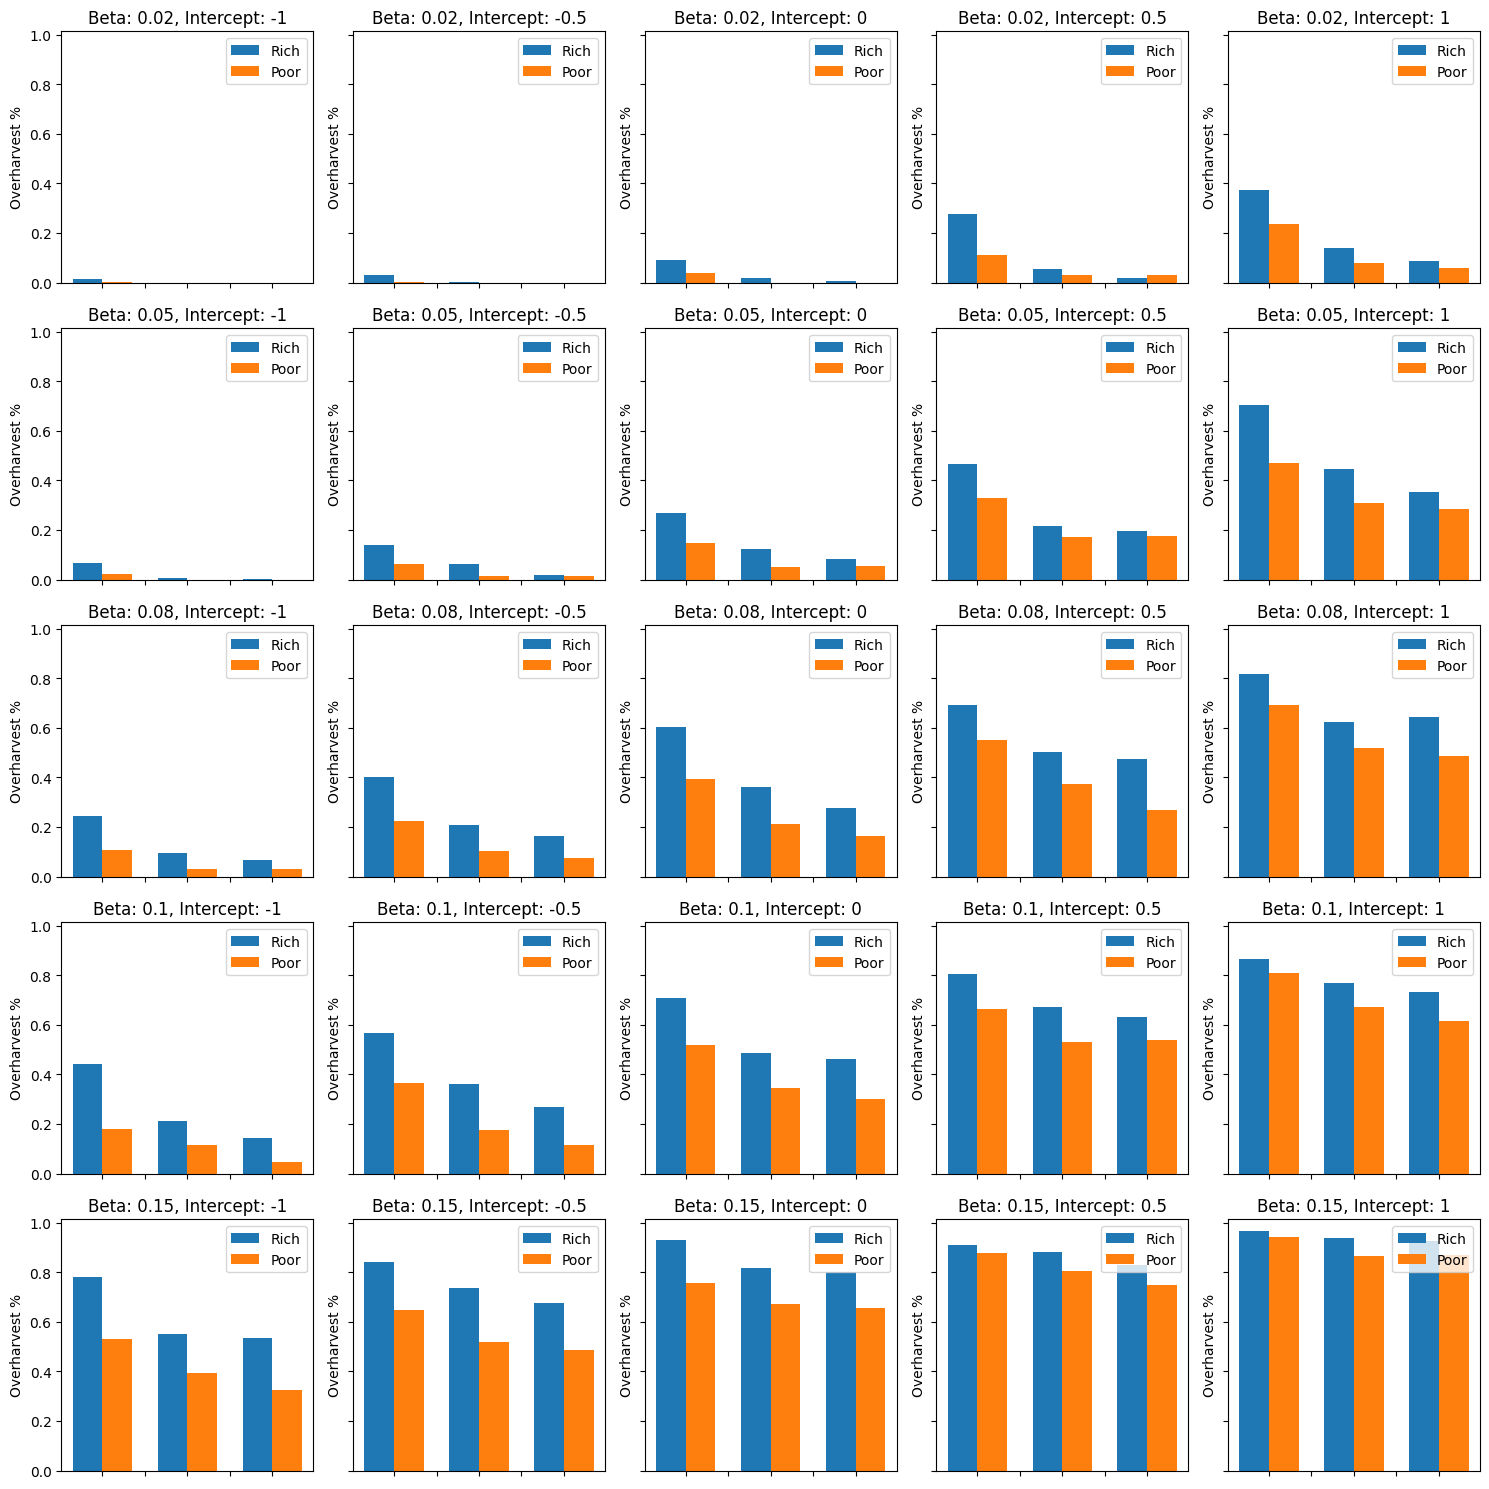

In [7]:
# beta_values = [0.02, 0.05, 0.08, 0.1, 0.15]
# intercept_values = [-1, -0.5, 0, 0.5, 1]

# fig, axes = plt.subplots(len(beta_values), len(intercept_values), figsize=(15, 15), sharey=True)

# for b_idx, beta in enumerate(beta_values):
#     for i_idx, intercept in enumerate(intercept_values):
#         agent = Agent(beta=beta, intercept=intercept)
#         rich_overharvest, _ = run_simulation(agent, patch_types, rich_proportions, mvt_rich)
#         poor_overharvest, _ = run_simulation(agent, patch_types, poor_proportions, mvt_poor)
#         ax = axes[b_idx, i_idx]
#         plot_results(ax, beta, intercept, patch_types, rich_overharvest, poor_overharvest)

# fig.tight_layout()
# plt.show()

In [61]:
# Function to compute mean and variance
def compute_stats(leave_times):
    leave_times = np.array(leave_times)
    mean_leave_time = np.mean(leave_times)
    var_leave_time = np.var(leave_times)
    return mean_leave_time, var_leave_time

In [62]:
def prepare_results(beta_values, intercept_values, patch_types, rich_proportions, poor_proportions):
    # Prepare data structures to hold results
    model = 'epsilon_greedy'
    results = []

    for beta in beta_values:
        for intercept in intercept_values:
        # Initialize the agent with current beta and intercept
            agent = Agent(beta=beta, intercept=intercept)

        # Run simulations
            rich_stats = []
            poor_stats = []

            for patch, proportion in zip(patch_types, rich_proportions):
                leave_times = simulate(patch, agent, model, n_runs=int(1000 * proportion))
                stats = compute_stats(leave_times)
                rich_stats.append(stats)

            for patch, proportion in zip(patch_types, poor_proportions):
                leave_times = simulate(patch, agent, model, n_runs=int(1000 * proportion))
                stats = compute_stats(leave_times)
                poor_stats.append(stats)

        # Store results
            results.append({
            'beta': beta,
            'intercept': intercept,
            'rich_stats': rich_stats,
            'poor_stats': poor_stats
        })
    return results

Varying beta keeping intercept constant

In [55]:
# Prepare results for varying beta from 0 to 1 and plotting the expected leaving time
beta_values = np.linspace(0, 1, 21)  # 21 points from 0 to 1
intercept_values = [-5]  # Fixed intercept at 0

patch_types, rich_prop, poor_prop = initialize_env(0.075)
results = prepare_results(beta_values, intercept_values, patch_types, rich_prop, poor_prop)

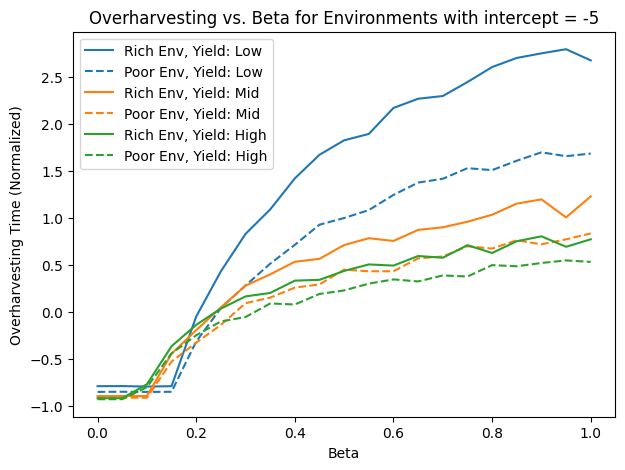

In [56]:
# Extract expected leaving times for each patch type in rich and poor environments
rich_overharvest_times = ([[stat[0] for stat in result['rich_stats']] for result in results] - mvt_rich) / mvt_rich
poor_overharvest_times = ([[stat[0] for stat in result['poor_stats']] for result in results] - mvt_poor) / mvt_poor

# Plot the results for rich environment
plt.figure(figsize=(7, 5))
for i in range(len(rich_overharvest_times[0])):
    plt.plot(beta_values, [times[i] for times in rich_overharvest_times], label=f'Rich Env, Yield: {patch_types[i]["type"]}')
    plt.plot(beta_values, [times[i] for times in poor_overharvest_times], color=plt.gca().lines[-1].get_color(), linestyle='--', label=f'Poor Env, Yield: {patch_types[i]["type"]}')
    
plt.xlabel('Beta')
plt.ylabel('Overharvesting Time (Normalized)')
plt.title(f'Overharvesting vs. Beta for Environments with intercept = {intercept_values[0]}')
plt.legend()
plt.show()

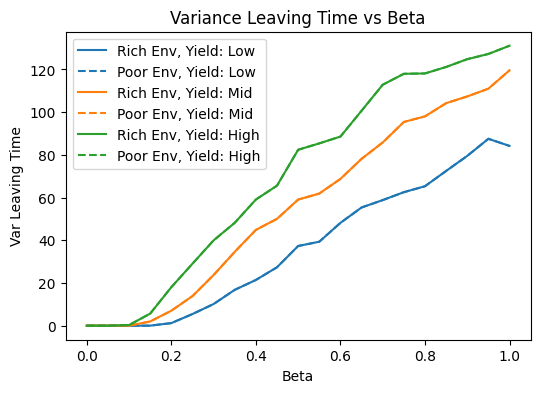

In [40]:
# Extract expected leaving times for each patch type in rich and poor environments
var_leaving_times = [[stat[1] for stat in result['rich_stats']] for result in results]
var_leaving_times = [[stat[1] for stat in result['poor_stats']] for result in results]

# Plot the results for rich environment
plt.figure(figsize=(6, 4))
for i in range(len(var_leaving_times[0])):
    plt.plot(beta_values, [times[i] for times in var_leaving_times], label=f'Rich Env, Yield: {patch_types[i]["type"]}')
    plt.plot(beta_values, [times[i] for times in var_leaving_times], label=f'Poor Env, Yield: {patch_types[i]["type"]}', color=plt.gca().lines[-1].get_color(), linestyle='--',)

plt.xlabel('Beta')
plt.ylabel('Var Leaving Time')
plt.title('Variance Leaving Time vs Beta')
plt.legend()
plt.show()

Keeping beta constant changing intercept

In [50]:
# Prepare results for varying beta from 0 to 1 and plotting the expected leaving time
beta_values = [0.2]  # Two beta values
intercept_values = np.linspace(-4, 1, 31)  # Fixed intercept range

patch_types, rich_prop, poor_prop = initialize_env(0.075)
results_intercept = prepare_results(beta_values, intercept_values, patch_types, rich_prop, poor_prop)

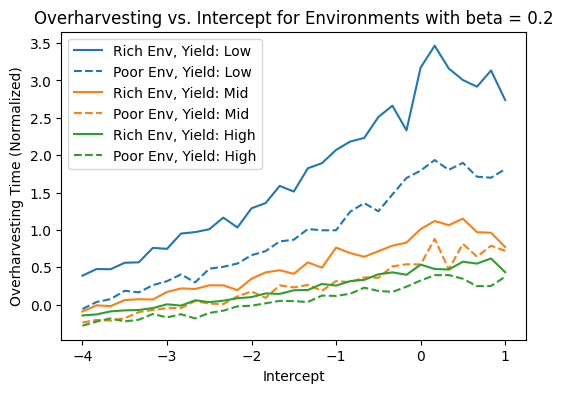

In [51]:
# Extract expected leaving times for each patch type in rich and poor environments
rich_leaving_times = ([[stat[0] for stat in result['rich_stats']] for result in results_intercept] - mvt_rich) / mvt_rich
poor_leaving_times = ([[stat[0] for stat in result['poor_stats']] for result in results_intercept] - mvt_poor) / mvt_poor

# Plot the results f
plt.figure(figsize=(6, 4))
for i in range(len(rich_leaving_times[0])):
    plt.plot(intercept_values, [times[i] for times in rich_leaving_times], label=f'Rich Env, Yield: {patch_types[i]["type"]}')
    plt.plot(intercept_values, [times[i] for times in poor_leaving_times], color=plt.gca().lines[-1].get_color(), linestyle='--', label=f'Poor Env, Yield: {patch_types[i]["type"]}')
    
plt.xlabel('Intercept')
plt.ylabel('Overharvesting Time (Normalized)')
plt.title(f'Overharvesting vs. Intercept for Environments with beta = {beta_values[0]}')
plt.legend()
plt.show()